## <font color = 'purple'> _**1. Frame the problem and look at the big picture.**_</font>

> To work with the diabetes dataset using linear regression, you can follow these steps. First, import the necessary libraries and load the diabetes dataset, splitting it into features (X) and the target variable (y). Next, divide the data into training and testing sets to evaluate the model's performance on unseen data. Then, create a linear regression model and train it using the fit() method on the training data. After training, make predictions on the testing set using the predict() method. Evaluate the model's performance by comparing the predicted values with the actual values, using metrics like mean squared error (MSE), root mean squared error (RMSE), or mean absolute error (MAE). Finally, interpret the model's results by analyzing the coefficients and their relationship with the target variable. Remember to explore additional techniques like feature scaling, feature selection, and regularization to enhance the model's performance and interpretability.


## <font color = 'purple'> _**2. Get the data**_ </font>

Attributes:
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]

Target Attribute:
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96. 

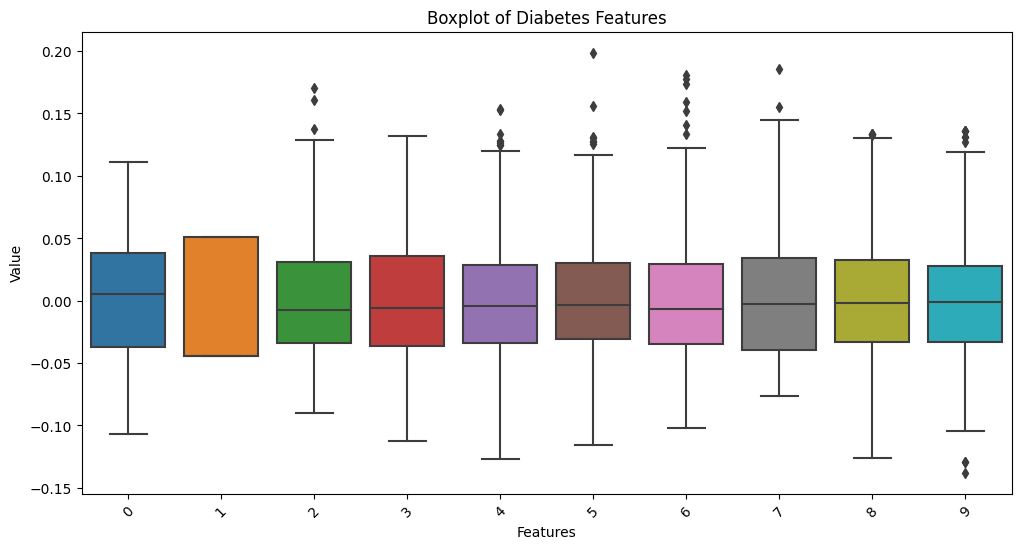

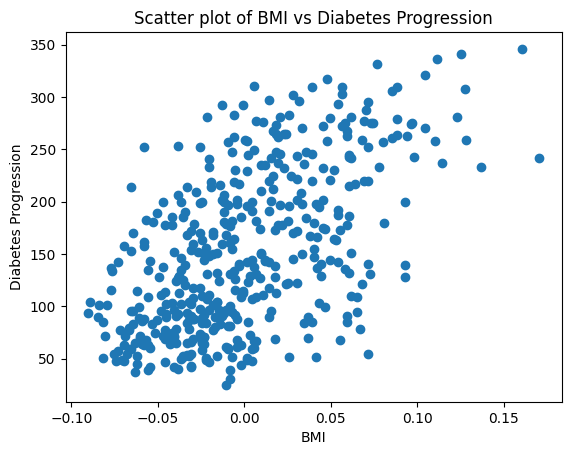

In [56]:
import matplotlib.pyplot as plt 
import copy
import seaborn as sns
import numpy as np 
import pandas as pd 
from sklearn  import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error


# Load Diabetes Datasetes
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# Study each attribute and its characteristics
print("Attributes:")
print(diabetes_X)
print()
             ####   Explore the data to gain insights.
# Study the dependant variable 
print("Target Attribute:")
print(diabetes_y)
print()

# Get the shape of data
diabetes_X.shape
# 
# Create boxplots for each attribute in diabetes_X
plt.figure(figsize=(12, 6))
sns.boxplot(data=diabetes_X)
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Boxplot of Diabetes Features")
plt.show()

# Create a scatter plot of a specific attribute against the target variable
plt.scatter(diabetes_X[:, 2], diabetes_y)
plt.xlabel("BMI")
plt.ylabel("Diabetes Progression")
plt.title("Scatter plot of BMI vs Diabetes Progression")
plt.show()




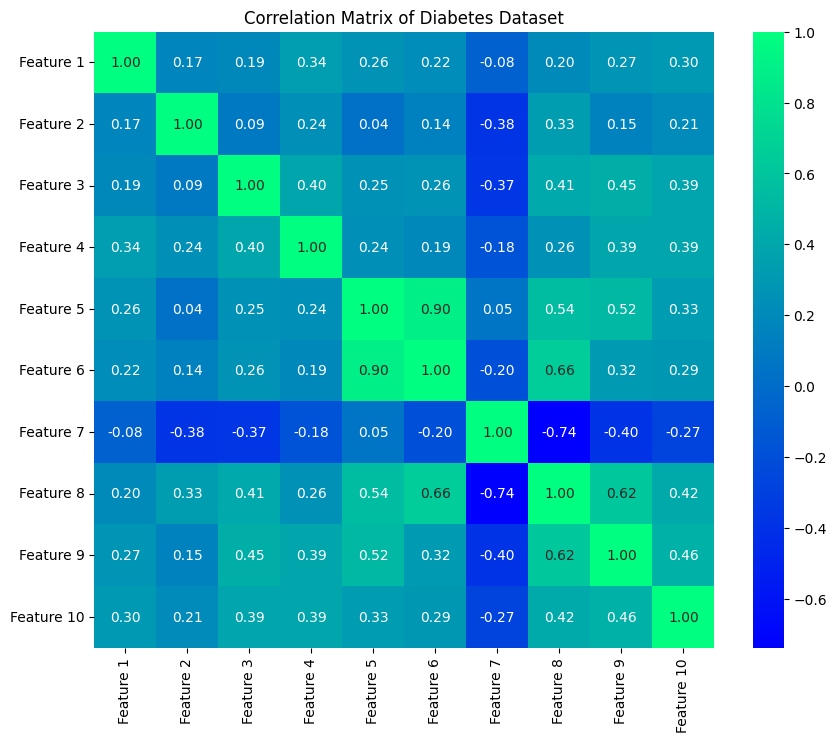

In [49]:
# Study attribute correlations using heatmap
correlation_matrix = np.corrcoef(diabetes_X, rowvar=False)
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='winter', fmt=".2f",
            xticklabels=["Feature {}".format(i+1) for i in range(diabetes_X.shape[1])],
            yticklabels=["Feature {}".format(i+1) for i in range(diabetes_X.shape[1])])
plt.title("Correlation Matrix of Diabetes Dataset")
plt.show()

> The heatmap provides a visual representation of the correlations, where warmer colors indicate stronger positive correlations and cooler colors indicate stronger negative correlations. By studying the correlation matrix, you can identify relationships between different attributes, which can help in feature selection, identifying important predictors, and understanding the data's underlying structure.

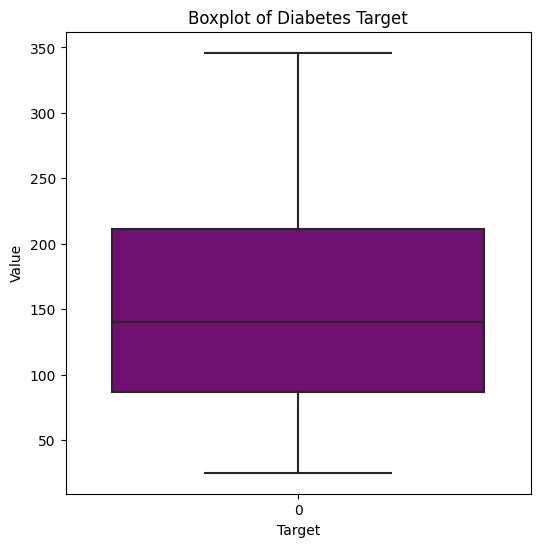

In [50]:

#####             ######

def calculate_statistics(data):
    statistics = {
        'mean': np.mean(data, axis=0),
        'std': np.std(data, axis=0),
        'min': np.min(data, axis=0),
        'max': np.max(data, axis=0)
    }
    return statistics

# Calculate statistics for diabetes_X
x_statistics = calculate_statistics(diabetes_X)
#print(x_statistics)
# Calculate statistics for diabetes_y
y_statistics = calculate_statistics(diabetes_y)

boxplot_color = 'purple'
# 
# Create a boxplot for the target variable diabetes_y
plt.figure (figsize=(6, 6))
sns.boxplot(data=diabetes_y.reshape(-1, 1),color=boxplot_color)
plt.xlabel("Target")
plt.ylabel("Value")
plt.title("Boxplot of Diabetes Target")
plt.show()


In [57]:
diabetes_X = diabetes_X[:,None,2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(442, 1) (353, 1) (89, 1)
Coefficients
 [974.48209999]
Mean Squarred error 
 3898.26
MAE:  49.33
RMSE: 62.44
R-Squared:  0.29
(89, 1)   (89,)
(89, 1)   (89,)


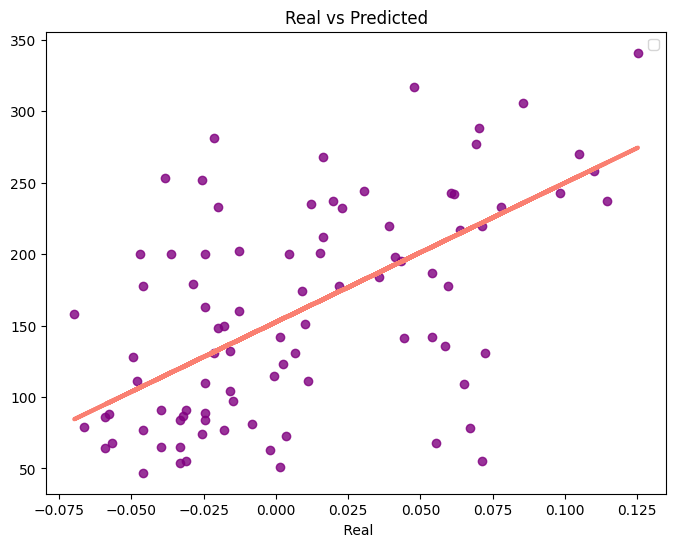

In [60]:
##########################################
## Splitting the data into Train/ Test set  ##
#########################################

X_train, X_test,y_train, y_test = train_test_split(diabetes_X,diabetes_y, test_size = 0.2, random_state=2)
print(diabetes_X.shape, X_train.shape, X_test.shape)

# Create linear Regression Model 
lr = linear_model.LinearRegression()
# Train the model using the training set 
lr.fit(X_train, y_train)

# Make predictions using the testing set 
diabetes_y_Pred = lr.predict(X_test)

print("Coefficients\n",lr.coef_)  # Estimated coefficients for the linear regression problem


######################### 
###       Metrics     ###
#########################
# Regression Evaluation metrics 
#from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Mean Squarred error \n %.2f' % mean_squared_error(y_test,diabetes_y_Pred))
print("MAE: ", (np.round(mean_absolute_error(y_test,diabetes_y_Pred), 2)))
print("RMSE: {}".format(np.round(np.sqrt(mean_squared_error(y_test,diabetes_y_Pred)), 2)))
print("R-Squared: ", (np.round(r2_score(y_test,diabetes_y_Pred), 2)))
print(X_test.shape," ", y_test.shape)
print(X_test.shape," ", diabetes_y_Pred.shape)
###########################
##       Plot output     ##
# ###########################
plt.figure(figsize=(8,6))
plt.scatter(X_test,y_test, color ='Purple', alpha = 0.8)
plt.plot(X_test,diabetes_y_Pred , color = 'salmon',linewidth= 3 )
plt.xlabel(' Real')
plt.title( 'Real vs Predicted')
plt.legend()
plt.show()